## 1. Importing the libraries and dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## 2. Implementing Thompson sampling

In [8]:
selected_ads_bin = []

no_of_ads = len(dataset.columns)
no_of_episodes = len(dataset)

N0 = np.zeros(no_of_ads)
N1 = np.zeros(no_of_ads)


for t in range(no_of_episodes):
    selected_ad = 0
    max_random = 0

    for ad in range(no_of_ads):
        # Gets a random value from beta-distribution (beta vs alpha).
        alpha = N1[ad] + 1
        beta = N0[ad] + 1
        random_beta = random.betavariate(alpha, beta)
        
        if random_beta > max_random:
            max_random = random_beta
            selected_ad = ad
    
    selected_ads_bin.append(selected_ad)
    
    if dataset.values[t, selected_ad] != 0:
        N1[selected_ad] += 1
    else:
        N0[selected_ad] += 1

## 3. Display results

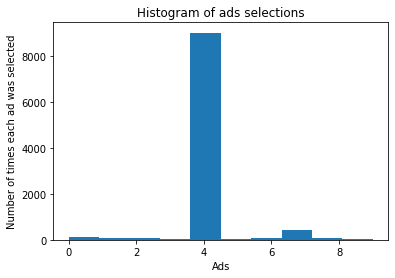

In [9]:
plt.hist(selected_ads_bin)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()